# Assignment 2: Keeping up with social information (part 2)

© Cristian Danescu-Niculescu-Mizil, 2023

<p style="text-align:center">
    <img src="https://imgs.xkcd.com/comics/social_media.png" alt="xkcd Social Media: The social media reaction to this asteroid announcement has been sharply negative. Care to respond?" width="650"/><br/>(source: <a href="https://xkcd.com/1239/">xkcd.com/1239</a>)
</p>

- - -

## INFO/CS 4300: Language and Information <a class="anchor" id="guidelines"></a>

> <font color='red'> **DUE**: </font>
>
> * <font color='red'> [PART 1] February 08, 2023 (Wednesday), 11:59pm </font>
> * <font color='red'> [PART 2] February 15, 2023 (Wednesday), 11:59pm </font>
>  
> (See [below](#contents) for what constitutes [part 1](#part1) and what constitutes [part 2](#part2).)

This assignment is an **individual** component.

In this assignment we will further build upon our analysis of the transcripts from the reality TV show "[*Keeping Up With The Kardashians*](https://en.wikipedia.org/wiki/Keeping_Up_with_the_Kardashians)" from where we left off since Assignment 1. We will try to uncover some simple social dynamics that are shown through language using various statistical and linguistic techniques, to better understand conversational behavior.

**Note**: While the assignment is straightforward, it introduces several critical ways of analyzing conversations, and is expectedly (definitely) longer than completable-in-one-day's work. We strongly recommend that you start with the assignment early so as to not rush with it in the end. Happy conversational analysis!

<u>Contributors</u>: In addition to the course staff for INFO/CS 4300 from the past runs, Tushaar Gangavarapu, Altria Wang, Kai Horstmann, and Jae Kim worked on updating this assignment, while Saif Mahmud, Raymond Chang, Yvette Hung, and Eunice Zhang were involved in testing the assignment.

- - -

#### Learning objectives

This project aims to help you get comfortable working with the following tools, technologies, and/or concepts:

* Text similarity measures (standard/generalized Jaccard similarity)
* Plotting heatmaps in `matplotlib`
* Advanced numpy functionality
* Interaction strength
* Social interaction analysis 
* Character priming
* Conversation analysis

- - -

#### Academic integrity and collaboration

As mentioned, this project should be completed **individually**. As a result, all University-standard academic integrity guidelines must be followed.

- - -

#### Guidelines

* All (code) cells that contain the blocks that read `# YOUR CODE GOES HERE` are editable, and are to be completed to ensure you pass the test cases. Make sure to write your code only where it is indicated to do so.

* Please delete `raise NotImplementedError()` after filling in the function code. It is only meant to be a temporary placeholder 

* All (text) cells that read `YOUR ANSWER GOES HERE` are free-response cells that are editable and are to be completed.

* You may use any number of notebook cells to explore the data and test out your functions, although you will only be graded on the solution itself.

* You are unable to modify the read-only cells.

* **Do not delete the cells for optional questions, even if you do not choose to answer them.**

* You should also use Markdown cells to explain your code and discuss your results when necessary. Instructions to use Markdown can be found [here](http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Working%20With%20Markdown%20Cells.html).

* All floating point values should be printed with **2 decimal places** precision (unless otherwise stated). You can do so using the built-in round function.

- - -

#### Grading

For code-completion questions, you will be graded on passing the public test cases we have included, as well as any hidden test cases that we have supplemented within a given amount of time to ensure that your logic is correct.

For free-response questions, you will be manually graded on the quality of your answer.

- - -

#### Submission

* This entire notebook is expected to run with an upper bound being ~1-2 minutes.

* Also make sure to remove any **redundant print statements** to speed things up and prevent generating unnecessary outputs.

* <font color='red'><u>Important</u></font>: You are expected to submit this notebook twice (once for part 1 submission and once for part 2 submission), as your submission for Assignment 2:
  * For [PART 1](#part1) submission (due: 02/08), upload the entire notebook file, filling all cells *up to* [PART 2](#part2); you will *only* be graded on all the cells filled till part 2 (any cells filled beyond that will NOT be considered for part 1 grading).
  * For [PART 2](#part2) submission (due: 02/15), ensure to have filled all the cells; you will *only* be graded on the cells spanning *between* part 2 and the end of the notebook. Any changes made to part 1 will NOT affect your part 1 score. However, you should fix any errors in your part 1 solutions because they might affect the correctness of your part 2 outputs.

* Each time you submit the notebook, also submit an html copy of the notebook (you can create this by clicking File → Download as → HTML (.html)).

- - -
### Contents  <a class="anchor" id="contents"></a>

* [Instructions and guidelines](#guidelines)
* [Contents](#contents)


* [[PART 1]](#part1) **Character interaction analyses** [<font color='red'>due: 02/08</font>]
  * [Imports and data](#0)
  * [[1](#1)] Similarity analysis to unfold character interactions
    * [[1a](#1a)] Character similarity w/ Jaccard 
    * [[1b](#1b)] Character-level average similarity 
    * [[1c](#1c)] Relative uniqueness of speakers
  * [[2](#2)] Character interaction analysis with generalized Jaccard
    * [[2a](#2a)] Term frequency (for generalized Jaccard)
    * [[2b](#2b)] Character similarity w/ generalized Jaccard
    * [[2c](#2c)] Character similarity w/ Jaccard vs. generalized Jaccard
  * [[3](#3)] Character-pair analysis
    * [[3a](#3a)] Character-pair analysis w/ generalized Jaccard
    * [[3b](#3b)] Relative speaker uniqueness
  * [[4](#4)] Character interactions
    * [[4a](#4a)] Character replies
    * [[4b](#4b)] Communication between characters


* [[PART 2]](#part2) **Interaction strength and social interaction patterns** [<font color='red'>due: 02/15</font>]
  * [[5](#5)] Character-pair specific reply diction
    * [[5a](#5a)] Words used most specifically by pairs of characters
    * [[5b](#5b)] Building character-pair word occurrence matrix
    * [[5c](#5c)] Weighting the character-pair word occurrences
    * [[5d](#5d)] Analyzing character-pair specific diction
  * [[6](#6)] Strength of interactions between speaker pairs
    * [[6a](#6a)] Pair interaction strength
    * [[6b](#6b)] Pair interaction strength and similarity
    * [[6c](#6c)] Analyzing pair interaction strength and similarity
    * [[6d](#6d)] Connecting pair interaction strength and similarity
  * [[7](#7)] Speaker characteristics and social interaction
    * [[7a](#7a)] Age-group and social interaction
    * [[7b](#7b)] Weighting age-group interactions matrix
    * [[7c](#7c)] Analyzing age-group and social interaction
    * [[7d](#7d)] [<font color='green'>optional</font>] Other characteristics and social interaction
  * [[8](#8)] Priming: Word choice influenced by the person being spoken to
    * [[8a](#8a)] Character priming matrix
    * [[8b](#8b)] Analyzing character priming findings
    * [[8c](#8c)] Repeated words in replies
    * [[8d](#8d)] Character priming word analysis
    * [[8e](#8e)] [<font color='green'>optional</font>] Character priming and interaction strength


* [Extra-credit assignment-2](#ec) [<font color='red'>due: 02/15</font>]

(For those curious, the rendering of backlink to "contents" from each section, i.e., the right corner [[contents](#contents)] link, is only accessible via .ipynb notebook, it causes unexpected behavior when viewed in .html.)

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

### [PART 1] Character interaction analyses <a class="anchor" id="part1"></a>
> <font color='red'>due 02/08 11:59pm</font>

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

### Imports and data <a class="anchor" id="0"></a>

Please do NOT import any additional modules; the following imports should be sufficient to work with. As such, you should try and use numpy functions as much as you can. To review numpy operations, see the resources on [Ed #60](https://edstem.org/us/courses/36001/discussion/2460122).

In [1]:
import re
import json
import os
from io import StringIO
import pickle

import numpy as np

# Plotting libraries.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

# Imports that might help with various functionality.
import functools
import operator

# Testing libraries.
from numpy.testing import assert_almost_equal

In [2]:
import sys

# Ensure that your kernel is using Python-3.x.
assert sys.version_info.major == 3

To ensure that you are comfortable moving forward. Make sure that you are familair with the following data structures that were defined in Assignment 1, as you will be using these throughout Assignment 2:
* `deduped_transcripts`
* `good_types`
* `word_matrix`
* `good_speakers`

In [3]:
# Load deduped transcripts from Assignment 1.
with open('deduped_transcripts.pickle', 'rb') as f:
    deduped_transcripts = pickle.load(f)

# Load `good_types` from Assignment 1.
with open('good_types.pickle', 'rb') as f:
    good_types = pickle.load(f)
n_good_types = len(good_types)

# Load the `word_matrix` from Assignment 1.
with open('word_matrix.pickle', 'rb') as f:
    word_matrix = pickle.load(f)

# Reusing `good_speakers` from Assignment 1.
good_speakers = [
    u'BRUCE', u'JONATHAN', u'KHLOE', u'KIM', u'KOURTNEY', u'KRIS', u'ROBERT', u'SCOTT'
]
n_good_speakers = len(good_speakers)

In [4]:
# Ensure that the pickled data stuctures are correct.
assert type(deduped_transcripts[0]) == tuple
assert n_good_types == 4517
assert n_good_speakers == 8

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

### Similarity analysis to unfold character interactions <a class="anchor" id="1"></a>

#### <font color='blue'> Question 1a (code completion): Character similarity w/ Jaccard </font> <a class="anchor" id="1a"></a>
We will begin by looking at which characters speak most similarly to each other. To analyze this, you will build a *symmetric* character-by-character matrix showing how similar each pair of characters is, then plot this matrix as a heatmap using `matplotlib imshow`. We will be using Jaccard similarity for this analysis. 

Jaccard similarity, $J(A, B)$, between two sets, $A$ and $B$, is computed as:
\begin{equation}
J(A, B) = \frac{\vert\, A \cap B \,\vert}{\vert\, A \cup B \,\vert}
\end{equation}

To fit the definition, we represent a character as a set of all words they use (as usual, we only consider "good types"). **Note that this formulation involves disregarding *how many times* a speaker said a word.**

Therefore, the definition can be rewritten as ($A$ and $B$ are sets of words uttered by two distinct characters):

$$ J(A, B) = \frac{\sum_{w\,\in\,\text{good types}} w \in A \,\text{and}\, w \in B}
{\sum_{w\,\in\,\text{good types}}w \in A \,\text{or}\, w \in B} $$

Since set intersection and union are symmetric operations, it follows that Jaccard similarity is also a symmetric:

$$ J(A, B) = J(B, A) $$

In the cell below, fulfill the function specification:

In [5]:
def create_j_sim_mat(input_n_speakers, input_word_matrix, input_good_types):
    """Create Jaccard similarity matrix for characters.

    Create Jaccard similarity matrix, a np.ndarray of size (`input_n_speakers`, `input_n_speakers`),
    computing the character similarity, where the entry (i, j) indicating the Jaccard similarity
    between the speakers `i` and `j`.

    Hint: To help you out, here are a few numpy operations you might find useful: np.zeros, 
    np.count_nonzero, np.sum.

    Parameters
    ----------
    input_n_speakers : int
        The number of input speakers to be chosen in constructing the Jaccard similarity matrix.
    input_word_matrix : np.ndarray
        The word occurrence matrix of (`n_good_speakers`, `n_good_types`), with the entry (i, j)
        indicating how often the speaker `i` utters word `j`.
    input_good_types : list
        An alphabetically-sorted list of all the words that appear in more than one episode 
        (referred to as "good types" in assignment 1).

    Returns
    -------
    np.ndarray
        The Jaccard similarity matrix of (`input_n_speakers`, `input_n_speakers`), with the entry
        (i, j) indicating the Jaccard similarity between the speakers `i` and `j`.
    """
    # YOUR CODE GOES HERE
    
    returnMatrix = np.zeros((input_n_speakers, input_n_speakers))
    
    for a in range(input_n_speakers):
        for b in range(input_n_speakers):
           
            intersection = 0
            union = 0 
            
            for i in range(len(input_good_types)):
                if input_word_matrix[a][i] > 0 and input_word_matrix[b][i]>0:
                    intersection +=1 
                if input_word_matrix[a][i] > 0 or input_word_matrix[b][i]>0:
                    union +=1 
            returnMatrix[a][b]  = intersection/union
            
    return returnMatrix

In [6]:
j_sim_matrix = create_j_sim_mat(n_good_speakers, word_matrix, good_types)

In [7]:
# This is an autograder test; we can test the function you just wrote above.
"""Check that `create_j_sim_mat` returns the correct output."""
assert type(j_sim_matrix) == np.ndarray
assert j_sim_matrix.shape == (8, 8)
assert j_sim_matrix[4][4] == 1
assert_almost_equal(round(j_sim_matrix[2][5], 1), 0.5)

To make our heatmap more interpretable we have explicitly set the range of our heatmap gradient using `vmin` and `vmax`. This means that values less than `vmin` will have the same shade as `vmin` (white) and that values more than `vmax` will have the same shade as `vmax` (black).

Try varying `vmin` and `vmax` to get a better sense of speaker similarities.

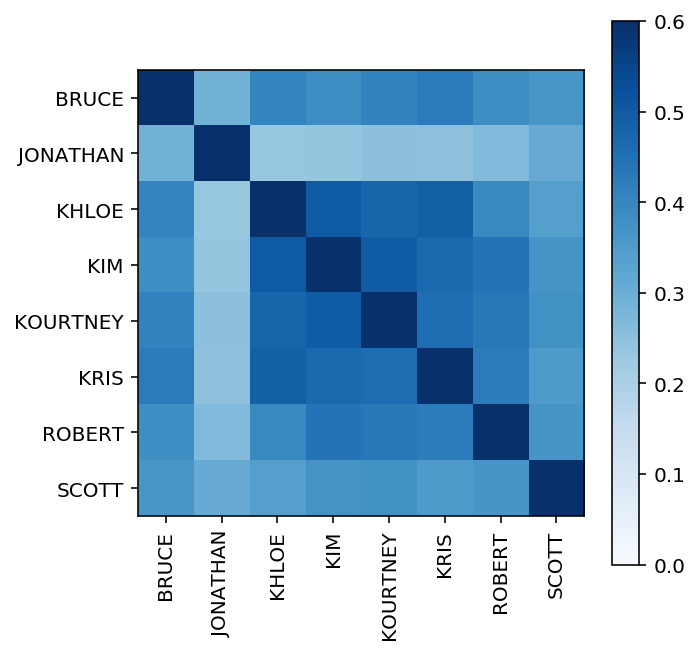

In [8]:
plt.figure(figsize=(5, 5))
plt.imshow(j_sim_matrix, interpolation='none', cmap=plt.cm.Blues, vmin=0, vmax=0.6)
plt.colorbar()

plt.xticks(range(n_good_speakers), good_speakers, rotation=90)
plt.yticks(range(n_good_speakers), good_speakers)
plt.show()

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

#### <font color='blue'> Question 1b (code completion): Character-level average similarity </font>  <a class="anchor" id="1b"></a>

To better understand the relative uniqueness of speakers, we will examine average similarity measurements for each character. You will build a dictionary that contains the mean similarity measurement for each speaker ignoring the speaker's self-similarity measurement. This function should take an arbitrary matrix (for the sake of future analysis that we will do) that is ordered by `good_speakers`.

Please define the function below which returns a dictionary with the following format:
```json
{CHARACTER_NAME_A: avg_score_a,
 CHARACTER_NAME_B: avg_score_b,
 ...
}
```

In [9]:
def avg_sim_dict(input_sim_matrix, input_good_speakers):
    """A dictionary of average Jaccard similarity scores.
    
    Returns a dictionary with the keys being speakers and the values being that character's average 
    similarity scores with all other characters (i.e., ignoring the speaker's self-similarity
    measurement).
    
    Hint: To help you out, here are a few numpy operations that might be useful: np.sum, np.average.
    
    Parameters
    ----------
    input_sim_matrix : np.ndarray
        The input similarity matrix, ordered by `input_good_speakers`.
    input_good_speakers : list
        A list of chosen "good" speakers.
    
    Returns
    -------
    dict
        A dictionary with speakers as keys and associated average similarity score as values.
    """
    # YOUR CODE GOES HERE
    
    returnDict = dict()

    sum = np.sum(input_sim_matrix, axis=1) #obtain the sum of the col 

    for i,speaker in enumerate(input_good_speakers):
        avg = (sum[i] - input_sim_matrix[i][i]) / (len(input_good_speakers) -1)
        returnDict[speaker] = avg
        
    return returnDict

In [10]:
avg_jaccard_sim_dict = avg_sim_dict(j_sim_matrix, good_speakers)

In [11]:
# This is an autograder test. Here we can test the function you just wrote above.
"""Check that `sim_dict` returns the correct output."""
assert type(avg_jaccard_sim_dict) == dict
assert avg_jaccard_sim_dict['JONATHAN'] > 0.2
assert avg_jaccard_sim_dict['KHLOE'], 1 > 0.4

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

#### <font color='blue'> Question 1c (code completion): Relative uniqueness of speakers </font>  <a class="anchor" id="1c"></a>

To more easily analyze the relative uniqueness of speakers, where the most unique speaker is the most dissimilar (i.e. lowest similarity score) to the other speakers. We will take an input average similarity dictionary and return the most and least unique speakers and their corresponding average similarity scores. As a result, we want to return a tuple of tuples in the following format:
```json
((MOST_UNIQUE_CHARACTER_NAME, LEAST_SIM_SCORE),
 (LEAST_UNIQUE_CHARACTER_NAME, MOST_SIM_SCORE))
```

In [12]:
def most_least_unique_characters(input_avg_sim_dict):
    """Returns a tuple which shows the most and least unique characters. 

    The desired tuple format should be the following: 
    ```((MOST_UNIQUE_CHARACTER_NAME, LEAST_SIM_SCORE),
        (LEAST_UNIQUE_CHARACTER_NAME, MOST_SIM_SCORE))```.
         
    Parameters
    ----------
    input_avg_sim_dict : dict
        A dictionary with speakers as keys and associated average similarity score as values.
    
    Returns
    -------
    tuple
        A tuple which shows the most and least unique characters, and their similarity scores.
    """
    # YOUR CODE GOES HERE

    sortedDict = sorted(input_avg_sim_dict.items(), key=lambda x:x[1])
    return (sortedDict[0], sortedDict[1])

In [13]:
most_least_tup = most_least_unique_characters(avg_jaccard_sim_dict)
print("MOST UNIQUE: {} - {:.2f}".format(*most_least_tup[0]))
print("LEAST UNIQUE: {} - {:.2f}".format(*most_least_tup[1]))

MOST UNIQUE: JONATHAN - 0.26
LEAST UNIQUE: SCOTT - 0.35


In [14]:
# This is an autograder test. Here we can test the function you just wrote above.
"""Check that `most_least_sim_pairs` returns the correct output."""
assert type(most_least_tup) == tuple
assert len(most_least_tup) == 2

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

### Character interaction analysis with generalized Jaccard  <a class="anchor" id="2"></a>

#### <font color='blue'> Question 2a (code completion): Term frequency (for generalized Jaccard) </font>  <a class="anchor" id="2a"></a>

The similarity measure that we took above doesn't take into account how often the characters say a word. To account for this, we can use *generalized Jaccard*, an extension of Jaccard to weighted sets.

For each word $w$ and each character $C$, we compute the frequency weight $\text{tf}(w, C)$ as the ratio between the number of times $C$ says the word $w$, and the total number of words (good types) said by $C$. For example, if we had a character named Ned, and all of the words that he said were "my name is ned stark of house stark" the $\text{tf}(stark, ned)$ would be $\frac{2}{8}$

Generalized Jaccard is:

$$ GJ(A, B) = \frac{\sum_{w \,\in \text{ good types}} \text{min}(\text{tf}(w, A), \text{tf}(w, B))}
{\sum_{w \,\in \text{ good types}} \text{max}(\text{tf}(w, A), \text{tf}(w, B))} $$

Note that Jaccard is equivalent to generalized Jaccard if the weights are binarized by truncating all positive weights to 1.

Firstly, you will begin by defining a `tf` function below. 

In [15]:
# To help you, we have incuded this variable which is an inverse index for `good_types`.
good_types_reverse_index = {t: i for i, t in enumerate(good_types)}

In [16]:
def tf(word_w, character_c, input_word_matrix):
    """Compute the term frequency weight for a given word and character.
    
    This function determines the term frequency weight as the ratio between the number of times an 
    input character `character_c` utters word `word_w`, and the total number of words said by 
    character `character_c`.
    
    Note: Please use full precision in your answer (do NOT round). Also, be sure to use the global
    variable `good_types_reverse_index` in this method (to ensure a smaller arg list). Finally, you
    may realize that this TF compute is different from the unnormalized TF taught in the class.
    
    Hint: You may find it helpful to use np.sum.
    
    Parameters
    ----------
    word_w : str
        The word whose term frequency weight is to be computed.
    character_c : int
        The index of the character within `good_speakers`. 
    input_word_matrix : np.ndarray
        The word occurrence matrix of (`n_good_speakers`, `n_good_types`), with the entry (i, j)
        indicating how often the speaker `i` utters word `j`.
    
    Returns
    -------
    float
        The (unrounded) term frequency weight for a given word and character.
    """
    # YOUR CODE GOES HERE
    
    wordIndex = good_types_reverse_index[word_w]
    num = input_word_matrix[character_c][wordIndex]
    
    #c가 말한 전체 단어의 갯수 
    sum = np.sum(input_word_matrix[character_c], axis=0) 
    
    return num/sum

In [17]:
# This is an autograder test. Here we can test the function you just wrote above.
"""Check that `tf` returns the correct output."""
assert (tf('hi', 3, word_matrix) * 100) > 0.10

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

#### <font color='blue'> Question 2b (code completion): Character similarity w/ generalized Jaccard </font>  <a class="anchor" id="2b"></a>

Now you will complete the function specification below, which will return a numpy array of character similarities computed via generalized Jaccard. For your convenience, here is the formulation of generalized Jaccard:

$$ GJ(A, B) = \frac{\sum_{w \,\in \text{ good types}} \text{min}(\text{tf}(w, A), \text{tf}(w, B))}
{\sum_{w \,\in \text{ good types}} \text{max}(\text{tf}(w, A), \text{tf}(w, B))} $$

In [18]:
def create_g_j_sim_mat(tf_method, input_word_matrix, input_good_types, input_n_speakers):
    """Create generalized Jaccard similarity matrix for characters.

    Create generalized Jaccard similarity matrix, an np.ndarray of size (`input_n_speakers`, 
    `input_n_speakers), computing the character similarity, where the entry (i, j) indicating the 
    generalized Jaccard similarity between the speakers `i` and `j`.

    Note: Try to minimize the use of `tf_method`.

    Parameters
    ----------
    tf_method : function
        A method to compute the term frequency weight for a given word and character. 
    input_word_matrix : np.ndarray
        The word occurrence matrix of (`n_good_speakers`, `n_good_types`), with the entry (i, j)
        indicating how often the speaker `i` utters word `j`.
    input_good_types : list
        An alphabetically-sorted list of all the words that appear in more than one episode 
        (referred to as "good types" in assignment 1).
    input_n_speakers : int
        The number of input speakers to be chosen in constructing the generalized Jaccard similarity
        matrix.

    Returns
    -------
    np.ndarray
        The generalized Jaccard similarity matrix of (`input_n_speakers`, `input_n_speakers`), with 
        the entry (i, j) indicating the generalized Jaccard similarity between the speakers `i` and
        `j`.
    """
    # YOUR CODE GOES HERE
    
    returnMatrix = np.zeros((input_n_speakers, input_n_speakers))
    
    for a in range(input_n_speakers): # a = speaker index A
        for b in range(input_n_speakers):
            
            num = 0 
            denom = 0 
            for w in input_good_types: #w = word 그 잡채 
                tfA = tf_method(w,a,input_word_matrix)
                tfB = tf_method(w,b,input_word_matrix)
            
                num += min(tfA,tfB)
                denom += max(tfA,tfB)
                
            returnMatrix[a][b] = num/denom
            
    return returnMatrix

In [19]:
g_j_sim_matrix = create_g_j_sim_mat(tf, word_matrix, good_types, n_good_speakers)
g_avg_jaccard_sim_dict = avg_sim_dict(g_j_sim_matrix, good_speakers)

In [20]:
g_most_least_tup = most_least_unique_characters(g_avg_jaccard_sim_dict)
print("MOST UNIQUE: {} - {:.2f}".format(*g_most_least_tup[0]))
print("LEAST UNIQUE: {} - {:.2f}".format(*g_most_least_tup[1]))

MOST UNIQUE: JONATHAN - 0.54
LEAST UNIQUE: ROBERT - 0.57


In [21]:
# This is an autograder test. Here we can test the function you just wrote above.
"""Check that `create_g_j_sim_mat` returns the correct output."""
assert type(g_j_sim_matrix) == np.ndarray
assert g_j_sim_matrix.shape == (8, 8)
assert type(g_avg_jaccard_sim_dict) == dict
assert g_j_sim_matrix[4][4] == 1
assert_almost_equal(round(g_j_sim_matrix[2][5], 1), 0.7)
assert g_avg_jaccard_sim_dict['JONATHAN'] > 0.5
assert g_avg_jaccard_sim_dict['KHLOE'] > 0.6

In [22]:
# This is an autograder test. Here we can test the function you just wrote above.
"""Check that `create_g_j_sim_mat` and `most_least_sim_pairs` returns the correct output."""
assert g_most_least_tup[0][0] == 'JONATHAN'

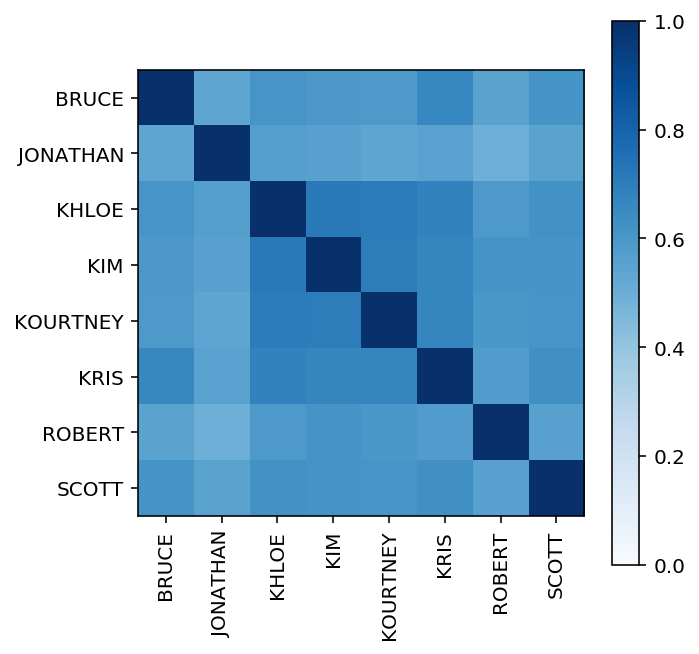

In [23]:
plt.figure(figsize=(5, 5))
plt.imshow(g_j_sim_matrix, interpolation='none', cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.colorbar()

plt.xticks(range(n_good_speakers), good_speakers, rotation=90)
plt.yticks(range(n_good_speakers), good_speakers)
plt.show()

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

#### <font color='green'> Question 2c (free response): Character similarity w/ Jaccard vs. generalized Jaccard </font>  <a class="anchor" id="2c"></a>

Isn't it cool how we are able to analyze character similarity using just conversational data?! Be sure to investigate how the generalized Jaccard similarity matrix differs from the standard Jaccard matrix and how the character similarity pairs change. 

In the cell below, please use Markdown to note any differences that you observed between the heatmaps generated with Jaccard and generalized Jaccard similarity measurements.

**Solution**: In general, I notice that the heatmap of the standard Jaccard similarity matrix is lighter than the generalized Jaccard similarity. This means that the generalized one captures more similarities than the standard one. This makes sense because we incorporated "how often the characters say a word" in the generalized one which leads to capturing more similarity. To be specific with some characters, I observe that the similarity between Kris and Robert and Krist and Scott have changed. Whereas Kris had more similarity with Robert than Scott in standard, Kris is more similar to Scott according to the generalized one.

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

### Character-pair analysis  <a class="anchor" id="3"></a>

#### <font color='blue'> Question 3a (code completion): Character-pair analysis w/ generalized Jaccard </font> <a class="anchor" id="3a"></a>

Leveraging the generalized Jaccard similarity matrix, `g_j_sim_matrix`, you will be measuring the relative similarity of "good speakers." The goal of this analysis is to determine which speaker is the most similar to everyone else, and which one is the least similar to everyone else.

To start, we'll build a list of floats of size `input_n_speakers` that corresponds to the average (mean) similarity between that character and all the rest of the characters (not including self-similarity). In the cell below, satisfy the specification and ensure that you leverage numpy primitives.

In [24]:
def create_avg_sims(input_g_sim):
    """Compute average similarity between a speaker and others, for all speakers.
    
    Returns a np.ndarray (of size equal to the number of input speakers, `input_n_speakers`) that
    gives the average (mean) similarity between speaker `i` and everybody except the speaker itself.
    
    Hint: To help you out, here are a few numpy operations that might be useful: np.sum, np.average.
    
    Parameters
    ----------
    input_g_sim : np.ndarray
        The generalized Jaccard similarity matrix of (`input_n_speakers`, `input_n_speakers`), with 
        the entry (i, j) indicating the generalized Jaccard similarity between the speakers `i` and
        `j`.
    
    Returns
    -------
    np.ndarray
        An array that gives the average (mean) similarity between speaker `i` and everybody except 
        the speaker itself, for all the speakers.
    """
    # YOUR CODE GOES HERE
    
    returnMatrix = np.zeros(len(input_g_sim))
    
    for a in range(len(input_g_sim)):
        for b in range(len(input_g_sim)):
         
            sum = np.sum(input_g_sim, axis=0) #obtain the sum of the row 
            avg = (sum[a] - input_g_sim[a][a]) / (len(input_g_sim) -1)         
         
        returnMatrix[a] = avg
                   
    return returnMatrix

In [25]:
avg_sims = create_avg_sims(g_j_sim_matrix)

In [26]:
# This is an autograder test. Here we can test the function you just wrote above.
"""Check that `create_avg_sims` returns the correct output"""
assert type(avg_sims) == np.ndarray
assert avg_sims.shape == (8, )
assert sum(avg_sims) < 5

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

#### <font color='blue'> Question 3b (code completion): Relative speaker uniqueness </font> <a class="anchor" id="3b"></a>

This specific analysis concludes with the determination of which characters are the most and least similar to everyone else. In the cell bellow satisfy the above specification by returning a tuple in the following format:
```json
(MOST_SIMILAR_CHARACTER_NAME, LEAST_SIMILAR_CHARACTER_NAME)
```

In [27]:
def most_least_char_sim(input_avg_sims, input_good_speakers):
    """Identify the most and least similar characters.
    
    Returns a tuple that reveals the most and least similar characters, relative to the rest of the
    characters in `input_good_speakers`. 

    The desired tuple format should be the following:
    ```(MOST_SIMILAR_CHARACTER_NAME, LEAST_SIMILAR_CHARACTER_NAME)```.
    
    Parameters
    ----------
    input_avg_sims : np.ndarray
        An array that gives the average (mean) similarity between speaker `i` and everybody except 
        the speaker itself, for all the speakers.
    input_good_speakers : list
        A list of chosen "good" speakers.
        
    Returns
    -------
    tuple
        A tuple of most and least similar characters, relative to the rest of the characters. 
    """
    # YOUR CODE GOES HERE
    
    d = dict()
    for i,speaker in enumerate(input_good_speakers):
        d[speaker] = input_avg_sims[i]
    
    sortedDict = sorted(d.items(), key=lambda x:x[1])

    return( (sortedDict[-1][0],sortedDict[0][0]) )

In [28]:
sim_pairs = most_least_char_sim(avg_sims, good_speakers)
print("MOST SIMILAR: %s" % sim_pairs[0])
print("LEAST SIMILAR: %s" % sim_pairs[1])

MOST SIMILAR: KHLOE
LEAST SIMILAR: JONATHAN


In [29]:
# This is an autograder test. Here we can test the function you just wrote above.
"""Check that `most_least_char_sim` returns the correct output."""
assert type(sim_pairs) == tuple
assert len(sim_pairs) == 2

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

### Character interactions <a class="anchor" id="4"></a>

In this section we will make the assumption that, if speaker B says something immediately after speaker A, then it is in reply to speaker A's utterance. While this assumption is not correct in all cases (particularly for noisy transcript data), it should still give us some insight into how our characters are behaving. In many cases, making reasonable assumptions about your data can lead to new insights.

#### <font color='blue'> Question 4a (code completion): Character replies </font> <a class="anchor" id="4a"></a>

In this question, we will be looking at how often each character replies to every other character. Note that here, we consider B to be replying to A **only when speaker A gets a reply from speaker B in the next utterance**. Do not merge consecutive lines by the same speaker as the same speech/reply. For instance, in the example:

```json
Line 1: {speaker: A, text: ...}
Line 2: {speaker: A, text: ...}
Line 3: {speaker: B, text: ...}
Line 4: {speaker: B, text: ...}
```
Only line 3 should be considered a reply from speaker B to speaker A. Line 4 should NOT be considered (part of) a reply from speaker B to speaker A.

In [30]:
def create_reply_matrix(input_deduped_transcripts, input_good_speakers, input_n_speakers):
    """Create a reply matrix for character interactions.
    
    Returns a np.ndarray of shape (`input_n_speakers`, `input_n_speakers`) such that an entry (i, j)
    indicates the number of times speaker `j` replied to speaker `i`.
    
    Parameters
    ----------
    input_deduped_transcripts : list
        The list of input deduped transcripts, loaded from assignment 1.
    input_good_speakers : list
        A list of chosen "good" speakers.
    input_n_speakers : int
        The number of input speakers to be chosen in constructing the reply matrix (essentially, the
        number of good speakers).
    
    Returns
    -------
    np.ndarray
        The reply matrix of shape (`input_n_speakers`, `input_n_speakers`) such that an entry (i, j)
        indicates the number of times speaker `j` replied to speaker `i`.
    """
    # YOUR CODE GOES HERE
    
    returnMatrix = np.zeros((input_n_speakers, input_n_speakers ))
    
    for transcript in input_deduped_transcripts :
        
        for i,line in enumerate(transcript[1]): #transcript 한 줄 
            if i == 0: continue
            speakerA = transcript[1][i-1]["speaker"] #speakerA=String
            speakerB = line["speaker"]
            if speakerA != speakerB and speakerA in input_good_speakers and speakerB in input_good_speakers:
                speakerAindex = input_good_speakers.index(speakerA)
                speakerBindex = input_good_speakers.index(speakerB)
                returnMatrix[speakerAindex][speakerBindex] += 1 
                    
    return returnMatrix

In [31]:
reply_matrix = create_reply_matrix(deduped_transcripts, good_speakers, n_good_speakers)

In [32]:
# This is an autograder test. Here we can test the function you just wrote above.
"""Check that `create_reply_matrix` returns the correct output."""
assert type(reply_matrix) == np.ndarray
assert reply_matrix.shape == (8, 8)
assert reply_matrix[1][1] == 0
assert sum(reply_matrix[2]) > 2500
assert sum(reply_matrix[6]) < 950

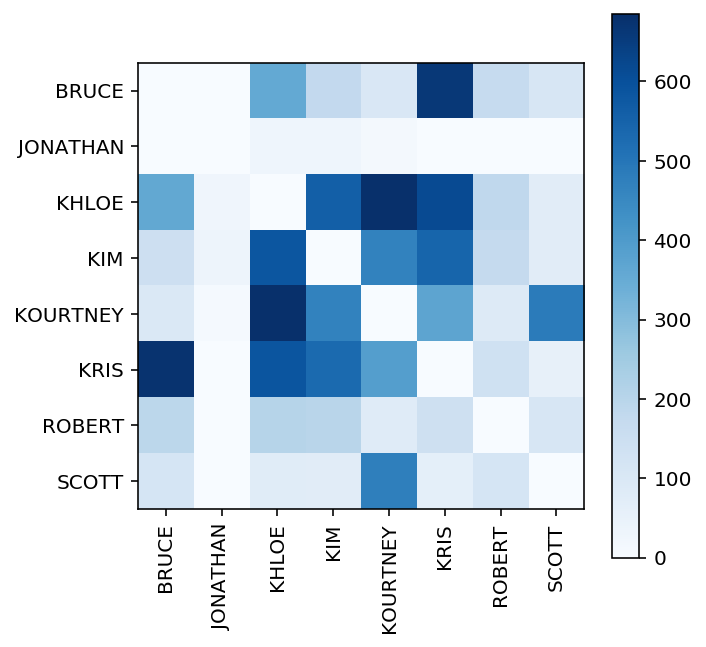

In [33]:
plt.figure(figsize=(5, 5))
plt.imshow(reply_matrix, interpolation='none', cmap=plt.cm.Blues)
plt.colorbar()

plt.xticks(range(n_good_speakers), good_speakers, rotation=90)
plt.yticks(range(n_good_speakers), good_speakers)
plt.show()

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

#### <font color='green'> Question 4b (free response): Communication between characters </font> <a class="anchor" id="4b"></a>

In the cell below, use Markdown to describe anything that you notice about the heatmap generated from ``reply_matrix``. What do you notice about the communication between certain characters?

**Solution**: I noticed that the heatmap is symmetric. It tells us that characters make the conversation, talking back and forth. For instance, Khole makes the most reply to Kourtney and vice versa. Khole is very active in making replies and receiving replies from other characters such as Bruce, Kim, Kourtney, and Kris. In contrast, Jonathan is least active in both receiving and replying to others. I guess Jonathan is not in a position to reply or get a reply from other characters

- - -
<p style="text-align:left;"> assignment-2 [PART 1] ends here <span style="float:right;font-size:11px;"> [[contents](#contents)] </span></p>
- - -

<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

### [PART 2] Interaction strength and social interaction patterns <a class="anchor" id="part2"></a>
> <font color='red'>due 02/15 11:59pm</font>

<u>Note</u>: Please ensure to have run [all the cells above](#part1) before proceeding further.

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

### Character-pair specific reply diction <a class="anchor" id="5"></a>

#### <font color='blue'> Question 5a (code completion): Words used most specifically by pairs of characters </font> <a class="anchor" id="5a"></a>

For this analysis, we will take only the pairs of characters that exchanged at least `min_exchange_messages` number of messages (e.g., 350 messages) between them (*good pairs*), in either direction. For example (in case of 350 messages), Speaker A and Speaker B are a *good pair* if A replies to B 175 times and B replies to A 175 times.

We will represent these *good pairs* as tuple pairs of character names (ordered alphabetically) and build a matrix where the rows correspond to the pairs, and the columns to the *good type* words.

You will begin by satisfying the specification in the cell below and determining the good pairs. The return type of the function will be a list of tuples in the following format:
```json
[(CHARACTER_NAME_A, CHARACTER_NAME_B),
 (CHARACTER_NAME_A, CHARACTER_NAME_C),
 ...
]
```

**Note: We will be numerically sorting the good pairs later.**

Hint: You are to only look at the interaction between the pairs, not all words each person says. As such you should be only relying on the `reply_matrix`. 

In [ ]:
def create_good_pairs(input_reply_matrix,
                      input_good_speakers,
                      input_n_speakers,
                      min_exchange_messages=350):
    """Create "good pairs" based on the number of messages exchanged.
    
    Returns a tuple list of good pairs in the following format:
    ```[(CHARACTER_NAME_A, CHARACTER_NAME_B), (CHARACTER_NAME_A, CHARACTER_NAME_C), ...]```.
    
    Note: Good pairs are bi-directional and should be included only once. That is, if (A, B) is in 
    the list, (B, A) should not be. Names should be ordered alphbetically within each tuple. Also,
    sorting the good pairs need not be handled in this function.
    
    Parameters
    ----------
    input_reply_matrix : np.ndarray
        The reply matrix of shape (`input_n_speakers`, `input_n_speakers`) such that an entry (i, j)
        indicates the number of times speaker `j` replied to speaker `i`.
    input_good_speakers : list
        A list of chosen "good" speakers.
    input_n_speakers : int
        The number of input speakers to be chosen in constructing the good pairs (essentially, the
        number of good speakers).
    min_exchange_messages : int
        The minimum number of messages to be exchanged between a character pair for them to be 
        considered a "good pair" (defaults to 350).
    
    Returns
    -------
    list
        A list of tuples of good pairs, based on the number of messages exchanged.
    """
    # YOUR CODE GOES HERE
    raise NotImplementedError()

In [ ]:
good_pairs = create_good_pairs(reply_matrix, good_speakers, n_good_speakers)
good_pairs.sort()

In [ ]:
# This is an autograder test. Here we can test the function you just wrote above.
"""Check that `create_good_pairs` returns the correct output."""
assert type(good_pairs) == list
assert len(good_pairs) < 15 and len(good_pairs) > 10
assert good_pairs[0] == tuple(sorted(good_pairs[0]))
assert (reply_matrix[tuple([good_speakers.index(s) for s in good_pairs[0]])] +
        reply_matrix[tuple([good_speakers.index(s) for s in good_pairs[0]][::-1])]) >= 350

In [ ]:
# To help you for the next couple of functions. We recommend you use the following variables
# as well as the good_type_reverse_index variable defined before
n_good_pairs = len(good_pairs)
good_pairs_reverse_index = {t: i for i, t in enumerate(good_pairs)}


# We have attached a tokenize method that you should use below:
def tokenize(text):
    """Returns a list of words that make up the text.    
    
    Parameters
    ----------
    text : str
        The input text string
    
    Returns
    -------
    list
        A list of tokens corresponding to the input string.
    """
    return [x for x in re.findall(r"[a-z]+", text.lower())]

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

#### <font color='blue'> Question 5b (code completion): Building character-pair word occurrence matrix </font> <a class="anchor" id="5b"></a>

As we continue the analysis we hope to build a character-pair word occurrence matrix. This matrix has rows that correspond to *good pairs* and columns that correspond to *good type* words. 

Note that here, like in [Question 3a](#3a), we consider B to be replying to A **only when speaker A gets a reply from speaker B in the next utterance**. Do not merge consecutive lines by the same speaker as the same speech/reply. For instance, in the example:
```json
Line 1: {speaker: A, text: ...}
Line 2: {speaker: A, text: ...}
Line 3: {speaker: B, text: ...}
Line 4: {speaker: B, text: ...}
Line 5: {speaker: A, text: ...}
```
If (A, B) is a *good pair*, then
* Line 3 should be included in (A, B)'s reply diction.
* Line 5 should be included in (A, B)'s reply diction.

As such, in the cell below, fulfill the specification to build this (`input_n_good_pairs`, `input_n_good_types`) matrix:

In [ ]:
def create_pair_words_mat(input_tokenize_method, input_deduped_transcripts, input_good_speakers,
                          input_n_speakers, input_n_good_types, input_n_good_pairs):
    """Create character-pair word occurrence matrix.
    
    Returns a np.ndarray of shape (`input_n_good_pairs`, `input_n_good_types`) such that the entry
    (i, j) indicates how many times pair `i` has replied good type word `j`.
    
    Hint: Use the global variables `good_pairs_reverse_index` and `good_types_reverse_index`.
    
    Parameters
    ----------
    input_tokenize_method : function
        A method that tokenizes the input text into tokens.
    input_deduped_transcripts : list
        The list of input deduped transcripts, loaded from assignment 1.
    input_good_speakers : list
        A list of chosen "good" speakers.
    input_n_speakers : int
        The number of input speakers to be chosen in constructing the matrix (essentially, the 
        number of good speakers).
    input_n_good_types : int
        The number of input good type words.
    input_n_good_pairs : int
        The number of input good character pairs.
    
    Returns
    -------
    np.ndarray
        An array of shape (`input_n_good_pairs`, `input_n_good_pairs`) such that the entry (i, j) 
        indicates how many times pair `i` has replied good type word `j`.
    """
    # YOUR CODE GOES HERE
    raise NotImplementedError()

In [ ]:
pair_words_mat = create_pair_words_mat(tokenize, deduped_transcripts, good_speakers,
                                       n_good_speakers, n_good_types, n_good_pairs)

In [ ]:
# This is an autograder test. Here we can test the function you just wrote above.
"""Check that `create_pair_words_mat` returns the correct output."""
assert type(pair_words_mat) == np.ndarray
assert pair_words_mat.shape == (n_good_pairs, n_good_types)
assert sum(pair_words_mat[5]) > 2000
assert sum(pair_words_mat[:, 8]) == 0

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

#### <font color='blue'> Question 5c (code completion): Weighting the character-pair word occurrences </font> <a class="anchor" id="5c"></a>

We will finish this analysis by reweighting the character-pair word occurrences such that each entry corresponds to the ratio between how often a given pair says a word and how often all of the *good pairs* said that word. This can be done quite simply with numpy primitives.

In order to de-emphasize the ratios of rare words (i.e. words in rare contexts are more likely to occur for only a single pair), we will apply additive smoothing also known as Laplace smoothing. This means that we will add one to each character-pair word occurrence before reweighting. So, for a given word $w$, pair $p$, and character-pair word occurrence $\text{count}(p, w)$, the weighted occurrence $W(p, w)$ is

$$ W(p, w) = \frac{\text{count}(p, w) + 1}{\displaystyle\sum_{\pi\,\in\,\text{good pairs}} \big(\text{count}(\pi, w) + 1\big)} $$

Below are a few examples of how some ratios will change assuming there are 10 good pairs.

$$
\begin{align*}
\frac{2}{2} = 1.0 \rightarrow \frac{3}{2 + 10} = 0.25;\,\,\, \frac{50}{50} = 1.0 \rightarrow \frac{51}{50 + 10} = 0.85;\,\,\, \frac{9}{10} = 0.9 \rightarrow \frac{10}{10 + 10} = 0.5
\end{align*}
$$


In the cell below, complete the specification and return the weighted words by each pair:

In [ ]:
def create_weighted_words(input_pair_words_mat):
    """Create weighted character-pair word occurrence matrix.
    
    Returns a np.ndarray with the same shape as `input_pair_words_mat`, such that entry (i, j) 
    indicates a weighted score showing how often a given pair replied a word.
    
    Note: Words may not be said by any pair.
    Hint: Use numpy primitives to optimize this function.
    
    Parameters
    ----------
    input_pair_words_mat : np.ndarray
        The character-pair word occurrence matrix with an entry (i, j) indicating how many times 
        pair `i` has replied good type word `j`.
    
    Returns
    -------
    np.ndarray
        A weighted character-pair word occurrence matrix such that entry (i, j) indicates a weighted
        score showing how often a given pair replied a word.
    """
    # YOUR CODE GOES HERE
    raise NotImplementedError()

In [ ]:
weighted_words = create_weighted_words(pair_words_mat)

In [ ]:
# This is an autograder test. Here we can test the function you just wrote above.
"""Check that `create_weighted_words` returns the correct output."""
assert type(weighted_words) == np.ndarray
assert weighted_words.shape == (n_good_pairs, n_good_types)
assert_almost_equal(weighted_words[-1, 1], 1 / 9)
assert_almost_equal(round(sum(weighted_words[:, 0]), 5), 1)
assert_almost_equal(round(sum(weighted_words[:, 2]), 5), 1)
assert sum(weighted_words[5]) > 100

Now, we can display the top 10 words between good pairs:

In [ ]:
for i, j in good_pairs:
    print("{}, {}".format(i, j))
    words = weighted_words[good_pairs_reverse_index[i, j]]
    ranked = sorted(enumerate(words), key=lambda x: x[1], reverse=True)
    for index, score in ranked[:10]:
        print("{:.2f} {}".format(score, good_types[index]))
    print()

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

#### <font color='green'> Question 5d (free response): Analyzing character-pair specific diction </font> <a class="anchor" id="5d"></a>

Now we have some sensible results to understand the specific diction between character pairs. In the cell below, please use Markdown to note any interesting observations/analysis you can take-away from the results above.

**Solution**: YOUR ANSWER GOES HERE

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

### Strength of interactions between speaker pairs <a class="anchor" id="6"></a>

#### <font color='blue'> Question 6a (code completion): Pair interaction strength </font> <a class="anchor" id="6a"></a>

In this question we will look at the strength of interactions between *all good speaker pairs* and how that relates to the similarity in their speech. We define interaction strength as the number of interactions between characters.

To do this, we will start by making some modifications to our `reply_matrix`. 
We want an `interaction_matrix` which includes the number of interactions between a pair of characters in total, not just the number of times a character has spoke to another character. Put another way, we want the matrix to be bi-directional and symmetric. To use our example:
```json
Line 1: {speaker: A, text: ...}
Line 2: {speaker: A, text: ...}
Line 3: {speaker: B, text: ...}
Line 4: {speaker: B, text: ...}
```
Line 3 should be considered an interaction between pair (Character A, Character B) as well as pair (Character B, Character A) in the `interaction_matrix`.

In [ ]:
def create_interaction_mat(input_reply_matrix, input_n_speakers):
    """Create an interaction matrix.
    
    Returns a np.ndarray of shape (`input_n_speakers`, `input_n_speakers`), such that the entry
    (i, j) indicates the combined number of times speaker `j` started a conversation with speaker
    `i` and vice versa.
    
    Parameters
    ----------
    input_reply_matrix : np.ndarray
        The reply matrix of shape (`input_n_speakers`, `input_n_speakers`) such that an entry (i, j)
        indicates the number of times speaker `j` replied to speaker `i`.
    input_n_speakers : int
        The number of input speakers to be chosen in constructing the reply matrix.
    
    Returns
    -------
    np.ndarray
        An interaction matrix, such that the entry (i, j) indicates the combined number of times 
        speaker `j` started a conversation with speaker `i` and vice versa.
    """
    # YOUR CODE GOES HERE
    raise NotImplementedError()

In [ ]:
interaction_matrix = create_interaction_mat(reply_matrix, n_good_speakers)

In [ ]:
# This is an autograder test. Here we can test the function you just wrote above.
"""Check that `create_exchange_mat` returns the correct output."""
assert type(interaction_matrix) == np.ndarray
assert interaction_matrix.shape == (8, 8)
assert sum(interaction_matrix[0]) > 3000 and sum(interaction_matrix[0]) < 3200
assert sum(interaction_matrix[:, 0]) > 3000 and sum(interaction_matrix[:, 0]) < 3200

Now let's take a look at how pair interaction strength compares with pair speech similarity. We first do this by looking at  trends for a specific character.

In [ ]:
def character_interaction_similarity_plot(input_interaction_matrix, input_similarity_matrix,
                                          input_character):
    """Plot the interaction-similarity relation for an `input_character`.
    
    x-axis: lists `good_speakers` in the order of high to low interaction with `input_character`.
    y-axis: generalized Jaccard similarity between each `good_speaker` and `input_character` pair.
    
    Parameters
    ----------
    input_interaction_matrix : np.ndarray
        An interaction matrix of shape (`input_n_good_pairs`, `input_n_good_pairs`), such that the
        entry (i, j) indicates the combined number of times speaker `j` started a conversation with
        speaker `i` and vice versa.
    input_similarity_matrix : np.ndarray
        The similarity matrix of (`input_n_speakers`, `input_n_speakers`), with the entry (i, j)
        indicating the generalized Jaccard similarity between the speakers `i` and `j`.
    input_character : str
        The chosen character for whom the interaction-similarity plot is to be drawn.
    """
    n = good_speakers.index(input_character)
    interaction_order = [
        idx
        for idx, sim in sorted(enumerate(interaction_matrix[n]), reverse=True, key=lambda x: x[1])
    ]
    similarity = [g_j_sim_matrix[n][i] for i in interaction_order]
    index = np.arange(n_good_speakers)

    plt.bar(index, similarity, color='tab:blue')

    plt.title(good_speakers[n])
    plt.xlabel('Interaction strength (high to low)')
    plt.ylabel('Similarity')
    plt.xticks(index, [good_speakers[i] for i in interaction_order])

    plt.show()

In [ ]:
plt.figure(figsize=(10, 4))
character_interaction_similarity_plot(interaction_matrix, g_j_sim_matrix, "KIM")

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

#### <font color='green'> Question 6b (free response): Pair interaction strength and similarity </font> <a class="anchor" id="6b"></a>

In the cell below, use Markdown to describe anything that you notice about how interaction strength compares to similarity for **Kim**.

**Solution**: YOUR ANSWER GOES HERE

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

#### <font color='blue'> Question 6c (code completion): Analyzing pair interaction strength and similarity </font> <a class="anchor" id="6c"></a>

To complete your analysis print a bar graph that generalizes the relationship between pair interaction strength and similarity. For simplicity, we rate each pair's interaction strength "high", "medium", and "low" depending on how many interactions were exchanged between the pair:
* High interaction strength: more than 500 interactions,
* Medium interaction strength: 150 interactions to 500 interactions (inclusive),
* Low interaction strength: less than 150 interactions.

In this analysis, categorize each pair into high, medium, or low interaction strength, and plot the average similarity of each category. That is, plot three bars on the x-axis (one for each category) against average similarity (for each category) on the y-axis.

Note: Pairs of good speakers are bidirectional in this analysis and should be included only once. That is, if you've included (BRUCE, KRIS), you shouldn't include (KRIS, BRUCE). Also, do not include pairs between the same person (e.g. (KIM, KIM))

Hint: Use `interaction_matrix` and `g_j_sim_matrix`.

In [ ]:
# YOUR CODE GOES HERE
raise NotImplementedError()

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

#### <font color='green'> Question 6d (free response): Connecting pair interaction strength and similarity </font> <a class="anchor" id="6d"></a>

These are some interesting connections between interaction strength and speech similarity. In the cell below, please use Markdown to note any interesting observations/analysis you can take-away from the results above. 

**Solution**: YOUR ANSWER GOES HERE

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

### Speaker characteristics and social interaction <a class="anchor" id="7"></a>

#### <font color='blue'> Question 7a (code completion): Age-group and social interaction </font> <a class="anchor" id="7a"></a>

Often we might want to examine how interactions differ depending on the characteristics of the people involved. In this case, we are interested in the extent to which people interact differently depending on the ages of the people they are talking to. 

For example, do people from one age group talk differently to people of other age groups than to people of their own?

For simplicity, we will divide the characters into two age groups and name them P for Parent and C for Child. We provide an age group dictionary below. You are welcome to **additionally** explore on your own other speaker characteristics.  If you find something interesting fill out the [optional free response cell below (7d)](#7d).

We will start by building a matrix with rows corresponding to age group combinations and columns corresponding to good type words. Age group combination (P, C) means that a person from group C is replying to a person from group P. In this analysis, we will consider all interactions, not just the good pairs.

In the cell below, complete the specification by returning the desired numpy array. (Hint: You can reuse your helper functions from above or the logic in the your previous methods.)

**Note**: Only consider the `good_types` in replies.

In [ ]:
# Here we provide you with the age groups for each character
# and age group combinations of interactions that you will be working with
age_group = {
    u'BRUCE': u'P',
    u'JONATHAN': u'C',
    u'KHLOE': u'C',
    u'KIM': u'C',
    u'KOURTNEY': u'C',
    u'KRIS': u'P',
    u'ROBERT': u'C',
    u'SCOTT': u'C'
}
age_group_index = {'P': 0, 'C': 1}
age_group_mat_index = {('P', 'P'): 0, ('P', 'C'): 1, ('C', 'P'): 2, ('C', 'C'): 3}

In [ ]:
def create_age_words_mat(input_tokenize_method, input_deduped_transcripts, input_good_speakers,
                         input_n_good_types):
    """Create age-group interactions matrix.
    
    Returns a np.ndarray of shape (4, `input_n_good_types`) such that the entry (i, j) indicates the
    number of times age group pair `i` says word `j`.
    
    Hint: You should use the global variables: `good_types_reverse_index`, `age_group`, 
    `age_group_index`, and `age_group_mat_index`.
    
    Parameters
    ----------
    input_tokenize_method : function
        A method that tokenizes the input text into tokens.
    input_deduped_transcripts : list
        The list of input deduped transcripts, loaded from assignment 1.
    input_good_speakers : list
        A list of chosen "good" speakers.
    input_n_good_types : int
        The number of input good type words.
    
    Returns
    -------
    np.ndarray
        An array of age-group interactions, such that the entry (i, j) indicates the number of times
        age group pair `i` says word `j`.
    """
    # YOUR CODE GOES HERE
    raise NotImplementedError()

In [ ]:
age_words_mat = create_age_words_mat(tokenize, deduped_transcripts, good_speakers, n_good_types)

In [ ]:
# This is an autograder test. Here we can test the function you just wrote above.
"""Check that `create_age_words_mat` returns the correct output."""
assert type(age_words_mat) == np.ndarray
assert age_words_mat.shape == (4, 4517)
assert sum(age_words_mat[1]) > 15000

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

#### <font color='blue'> Question 7b (code completion): Weighting age-group interactions matrix </font> <a class="anchor" id="7b"></a>

As we finish this portion of the analysis, we end by scoring the words by the ratio between how often a given age group combination said it and how often all of the combinations said it. This can be done quite simply with numpy primitives. As in [Question 5c](#5c), we will use additive smoothing to de-emphasize ratios of less frequent words.

In the cell below, complete the specification and return the weighted words by each age group pair:

Hint: You can reuse your helper functions from above or the logic in the your previous methods. 

In [ ]:
def create_age_weighted_words(input_age_words_mat):
    """Create weighted age-group interactions matrix.
    
    Returns a np.ndarray with the same shape as `input_age_words_mat`, such that entry (i, j) 
    indicates a weighted score showing how often a given age-group pair `i` uttered a good type
    word `j`.
    
    Note: Words may not be said by any pair.
    Hint: Use numpy primitives to optimize this function.
    
    Parameters
    ----------
    input_age_words_mat : np.ndarray
        The age-group interactions matrix with an entry (i, j) indicating how many times age-group 
        pair `i` has uttered good type word `j`.
    
    Returns
    -------
    np.ndarray
        A weighted age-group interactions matrix with an entry (i, j) indicating how many times age
        group pair `i` has uttered good type word `j`.
    """
    # YOUR CODE GOES HERE
    raise NotImplementedError()

In [ ]:
age_weighted_words = create_age_weighted_words(age_words_mat)

In [ ]:
# This is an autograder test. Here we can test the function you just wrote above.
"""Check that `create_gender_weighted_words` returns the correct output."""
assert type(age_weighted_words) == np.ndarray
assert age_weighted_words.shape == (4, 4517)
assert_almost_equal(round(sum(age_weighted_words[:, 0]), 5), 1)
assert_almost_equal(age_weighted_words[0, 1], 0.1)

In [ ]:
for i, j in age_group_mat_index.keys():
    print(i, j)
    words = age_weighted_words[age_group_mat_index[(i, j)]]
    ranked = sorted(enumerate(words), key=lambda x: x[1], reverse=True)
    for index, score in ranked[:10]:
        print('{:.2f} {}'.format(score, good_types[index]))
    print()

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

#### <font color='green'> Question 7c (free response): Analyzing age-group and social interaction </font> <a class="anchor" id="7c"></a>

These are some interesting results in regards to uncovering age group and the social interaction between age group pairs. In the cell below, please use Markdown to note any interesting observations/analysis you can take-away from the results above. 

**Solution**: YOUR ANSWER GOES HERE 

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

#### <font color='blue'> [optional] Question 7d (code completion): Other characteristics and social interaction </font> <a class="anchor" id="7d"></a>

We might want to examine how interactions differ depending on other characteristics of the people involved. You are welcome to **additionally** explore on your own other characteristics of the people. If you find something interesting fill out the optional free response cell below.<br>

While no extra points will be awarded for this task, it may help you with your extra-credit assignment.


In [ ]:
# YOUR CODE GOES HERE

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

### Priming: Word choice influenced by the person being spoken to <a class="anchor" id="8"></a>

<a href=https://en.wikipedia.org/wiki/Priming_(psychology)>Priming</a> is the phenomenon where a speaker tends to repeat certain words or language characteristics of the person they are replying to. It turns out that priming can often be observed in conversation. If A is talking to B, B will sometimes mirror A's language.

#### <font color='blue'> Question 8a (code completion): Character priming matrix </font> <a class="anchor" id="8a"></a>

In this analysis we will be looking at priming: i.e. when speaker B replies to speaker A, what is the probability that a word said by A will be repeated by B? 

That is, how many of the words in B's reply were also said by A (normalized by the number of words B said in total)?
Specifically, consider the following example:

```
Catelyn : Hi Ned, it is a really nice day today. Yes, it is.
Ned : It is a really really nice day today. Yes.
```

We should take the set of all words said by Catelyn: $W_c = \{$hi, ned, it, is, a, really, nice, day, today, yes$\}$, and the set of all words said by Ned: $W_n = \{$it, is, a, really, nice, day, today, yes$\}$, and perform the *priming computation*:

$$\frac{\left|W_c \cap W_n\right|}{\left|W_n\right|}$$

For a specific *ordered* pair of speakers A and B, we calculate the *arithmetic mean* of priming computations among all instances of B replying to A to get a single number between $0$ and $1$ as the answer to this question. That is, sum up the primed proportion for every B's reply to A and divide it by the number of times B replied to A.

The next couple methods will walk you through necessary pre-computations to get this priming matrix.
Do read through these functions carefully as you will be using their results.

In [ ]:
def merge_deduped(transcripts):
    """Merges adjacent transcript lines by the same speaker."""
    result = []
    for t_id, tscript in transcripts:
        prev_speaker = tscript[0]['speaker']
        prev_line = tscript[0]['text']
        tscript_result = []
        for i in range(1, len(tscript)):
            curr_speaker = tscript[i]['speaker']
            curr_line = tscript[i]['text']
            if curr_speaker == prev_speaker:
                prev_line = prev_line + " " + curr_line
            else:
                tscript_result.append({'speaker': prev_speaker, 'text': prev_line})
                prev_speaker = curr_speaker
                prev_line = curr_line
            if i == len(tscript) - 1:
                tscript_result.append({'speaker': prev_speaker, 'text': prev_line})
        result.append((t_id, tscript_result))
    return result


merged_deduped_transcripts = merge_deduped(deduped_transcripts)


def prev_lines_and_replies(A, B, tscript):
    """
    Creates an array of all the transcript lines involving supposed correspondence between A (first 
    speaker) and B (second speaker), both previous message and current message.
    """
    # Prepare results for B responses to A, previous speak.
    result = []
    prev_speaker = None
    prev_line = None

    # Go through every line of the transcript.
    for line in tscript:
        curr_speaker = line['speaker']

        # If dialogue has happened.
        if ((curr_speaker == B and prev_speaker == A)):
            # Add the previous line and the current line.
            result.append([prev_line, line])

        # Update the speaker and line.
        prev_speaker = curr_speaker
        prev_line = line

    return result


def ordered_lines_for_pair(A, B):
    """Gathers all lines in all transcripts for an ORDERED pair of characters."""
    result = []

    for _, tscript in merged_deduped_transcripts:
        result = result + prev_lines_and_replies(A, B, tscript)
    return result


def ordered_pairs_all_lines():
    """Gathers all lines in all transcripts for all ORDERED pairs of good characters."""
    result = dict()

    # Setup pairings (tuples).
    for i in range(0, n_good_speakers):
        for j in range(0, n_good_speakers):
            if i != j:
                tup = (good_speakers[i], good_speakers[j])
                result[tup] = ordered_lines_for_pair(*tup)
    return result


# Groupings per pair.
ordered_pairs_lines = ordered_pairs_all_lines()

So, `ordered_pairs_lines` is a data structure containing all of the lines and replies between the pairs of speakers, organized in the following way:

`dict → list → list → dict`
```json
(A, B): [
           [{speaker: A, text: ...}, {speaker: B, text: ...}],
           [{speaker: A, text: ...}, {speaker: B, text: ...}],
           ...
        ]
```

For example (not taken directly from the transcripts):
```json
('BRUCE', 'JONATHAN'): [
                          [{'speaker': 'BRUCE', 'text': 'The guy is hitting on you, big-time.'},
                           {'speaker': 'JONATHAN', 'text': 'And I am out of here early today.'}],
                          [{'speaker': 'BRUCE', 'text': 'No, I am not making a scene.'},
                           {'speaker': 'JONATHAN', 'text': 'What is that?'}],
                       ]
```

In the cell below, fulfill the specification to return a priming matrix:

Note: Ensure that only `good_types` are used. If you find that there are no good types in Speaker B's reply, skip that pair of lines (do not add anything to totals or proportions matrices) since there is no priming computation to be done.

In [ ]:
def create_pair_priming_mat(input_tokenize_method, input_ordered_pair_lines, input_good_speakers,
                            input_n_speakers):
    """Create the priming matrix from pair-wise ordered transcript lines.
    
    Returns a np.ndarray of size (`input_n_speakers`, `input_n_speakers`) where entry (i, j) is the
    mean of priming computations (proportions where numerator is the number of good types in `j`'s 
    reply also said by `i` and denominator is number of good types in `j`'s reply) across all pairs
    of lines where `j` replied to `i`.
    
    Hint: Use numpy primitives to make this function optimal.
    Note: You should use `good_types_reverse_index` global variable. 
    
    Steps:
        1. Iterate through each tuple (for each pair i, j).
        2. Grab only good types.
        3. Do the necessary priming calculations.
    
    Parameters
    ----------
    input_tokenize_method : function
        A method that tokenizes the input text into tokens.
    input_ordered_pair_lines : dict
        A dictionary of all of the lines and replies between pairs of speakers, organized as a dict
        (keys: pairs of speakers) of list of dict lists (as values); see above for specifics.
    input_good_speakers : list
        A list of chosen "good" speakers.
    input_n_speakers : int
        The number of input speakers to be chosen in constructing the priming matrix.
    
    Returns
    -------
    np.ndarray
        The priming matrix of size (`input_n_speakers`, `input_n_speakers`), where entry (i, j) is
        the mean of priming computations across all pairs of lines where `j` replied to `i`.
    """

    # We are providing you the code structure below to help you get started in the right direction.
    # You may edit it, if you want.
    good_types_set = set(good_types_reverse_index.keys())

    # Resultant matricies.
    proportions = np.zeros((input_n_speakers, input_n_speakers))
    totals = np.zeros((input_n_speakers, input_n_speakers))

    # All the pairs.
    for pair in input_ordered_pair_lines.keys():
        A = pair[0]  # A, who is prompting B
        i = input_good_speakers.index(A)
        B = pair[1]  # B, who is responding to A
        j = input_good_speakers.index(B)
        # For tuple arrays for each pair.
        for arrs in input_ordered_pair_lines[pair]:
            # Grab sets of words.
            response = input_tokenize_method(arrs[1]['text'])
            B_sent = set(response)
            A_sent = set(input_tokenize_method(arrs[0]['text']))

            # TODO:
            # 1. Reduce `B_sent` to just good types.
            # 2. Up the total number of correspondences for each pair.
            # 3. Compute priming calculations and sum for each pair.

            # YOUR CODE GOES HERE

    totals[totals == 0] += 1
    answer = proportions / totals  # get arithmetic mean
    return answer

In [ ]:
pair_priming_mat = create_pair_priming_mat(tokenize, ordered_pairs_lines, good_speakers,
                                           n_good_speakers)

In [ ]:
# This is an autograder test. Here we can test the function you just wrote above.
"""Check that `pair_priming_mat` returns the correct output."""
assert type(pair_priming_mat) == np.ndarray
assert pair_priming_mat.shape == (8, 8)
assert pair_priming_mat[0][0] == 0
assert pair_priming_mat[1][0] == 0
assert sum(pair_priming_mat[5]) > 0.7 and sum(pair_priming_mat[5]) < 0.8

In [ ]:
plt.figure(figsize=(5, 5))
plt.imshow(pair_priming_mat, interpolation='none', cmap=plt.cm.Blues)
plt.colorbar()

plt.xticks(range(n_good_speakers), good_speakers, rotation=90)
plt.yticks(range(n_good_speakers), good_speakers)
plt.show()

Consider the three character pairs with the most priming, as well as the three with the least. **Note that priming is not symmetric.** For example, Kim might tend to mimic Kourtney more than Kourtney mimicing Kim.

In the code we provided below we have ignored *ordered* pairs that have fewer than 100 words. Analyze the code and results provided:

In [ ]:
mat_items = []
for i in range(n_good_speakers):
    for j in range(n_good_speakers):
        if i != j and reply_matrix[i, j] >= 100:
            mat_items.append((pair_priming_mat[i, j], (i, j)))
mat_items.sort()

print("Top three pairs:")
top_3_priming_pairs = []
for score, (i, j) in reversed(mat_items[-3:]):
    top_3_priming_pairs.append((i, j))
    print("- {} repeats {} (score: {:.4f})".format(good_speakers[j], good_speakers[i], score, 5))
print("\nBottom three pairs:")
for score, (i, j) in reversed(mat_items[:3]):
    print("- {} repeats {} (score: {:.4f})".format(good_speakers[j], good_speakers[i], score, 5))

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

#### <font color='green'> Question 8b (free response): Analyzing character priming findings </font> <a class="anchor" id="8b"></a>

In the cell below, please use Markdown to describe anything that you notice about the heatmap generated from the priming matrix as well as the results above, in regards to the top/bottom three priming pairs. Were you expecting these results, or are were you surprised?

**Solution**: YOUR ANSWER GOES HERE

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

#### <font color='blue'> Question 8c (code completion): Repeated words in replies </font> <a class="anchor" id="8c"></a>

Next we are interested in the actual words that are being repeated in replies and how many times they are being repeated.

In the following example:
```text
Catelyn: Hi Ned, it is a really nice day today. Yes, it is.
Ned    : It is a really really nice day today. Yes.
```
We see that Ned repeats the words *it*, *is*, *a*, *nice*, *day*, *today*, and *yes* one time, and *really* two times. 

Note that in this analysis, we do not concern ourselves with how many times Catelyn repeats a word. That is, we disregard the fact that Catelyn has said the words *it* and *is* two times. We are only interested if Ned repeats words that Catelyn has said. 

For each of the three most-primed ordered pairs, what are the top 10 `good_types` being repeated? In the cell below, satisfy the specification to return the counts of repeated `good_types` per pair by returning a dictionary of word counts per ordered pair in the following format:

```json
{(CHARACTER_NAME_A, CHARACTER_NAME_B): 
    {word_1: count_1, word_2: count_2, ...}
 ...
}
```

In [ ]:
## Helper variables for the following cell.
ordered_pairs = list(ordered_pairs_lines.keys())
n_ordered_pairs = len(ordered_pairs)
ordered_pair_lookup = {}
for i in range(0, n_ordered_pairs):
    ordered_pair_lookup[ordered_pairs[i]] = i

In [ ]:
def word_counts_per_ordered_pair(input_ordered_pairs, input_ordered_pairs_lines):
    """Retrieve word counts of primed words per ordered pair.
    
    Returns a dictionary that contains all the word counts of primed words (`good_types`) per 
    ordered pair in the following format:
    ```{
           (character_index_a, character_index_b): {word_1: count_1, word_2: count_2...},
           (character_index_a, character_index_c): {word_1: count_1, word_2: count_2...},
           ...
        ...
       }```.
    
    Hint: Make sure to use the `good_types_reverse_index` global variable.
    
    Note: The dictionary you are returning should contain all word counts of primed words 
    (`good_types`), not just the top ten, and for all pairs, not just the top three.
    
    Parameters
    ----------
    input_ordered_pairs : list
        A list of all ordered pairs of characters with correspondance in `input_ordered_pair_lines`.
    input_ordered_pair_lines : dict
        A dictionary of all of the lines and replies between pairs of speakers, organized as a dict
        (keys: pairs of speakers) of list of dict lists (as values); see above for specifics.
    
    Returns
    -------
    dict
        A dictionary that contains all the word counts of primed words (`good_types`) per ordered
        pair in the required format.
    """
    # YOUR CODE GOES HERE
    raise NotImplementedError()

In [ ]:
priming_word_counts = word_counts_per_ordered_pair(ordered_pairs, ordered_pairs_lines)

In [ ]:
# This is an autograder test. Here we can test the function you just wrote above.
"""Check that `priming_word_counts` returns the correct output."""
assert type(priming_word_counts) == dict
assert len(priming_word_counts[('BRUCE', 'JONATHAN')]) > 0
assert len(priming_word_counts[('KRIS', 'KOURTNEY')]) > 100
assert sum(priming_word_counts[('KIM', 'KRIS')].values()) > 1000

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

#### <font color='blue'> Question 8d (code completion): Character priming word analysis </font> <a class="anchor" id="8d"></a>
  
To complete your analysis print the top ten words used by the top three priming pairs. The expected format is the following: 

```json
CHARACTER_NAME_A1 CHARACTER_NAME_A2
WORD_1_COUNTS WORD_1
...
WORD_10_COUNTS WORD_10

CHARACTER_NAME_B1 CHARACTER_NAME_B2
WORD_1_COUNTS WORD_1
...
WORD_10_COUNTS WORD_10

CHARACTER_NAME_C1 CHARACTER_NAME_C2
WORD_1_COUNTS WORD_1
...
WORD_10_COUNTS WORD_10
```
where, (A1, A2), (B1, B2), and (C1, C2) represent the top three priming pairs. (You can use the global variable `top_3_priming_pairs`.)

In [ ]:
# YOUR CODE GOES HERE
raise NotImplementedError()

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

#### <font color='green'> [optional] Question 8e (free response): Character priming and interaction strength </font> <a class="anchor" id="8e"></a>

We have previously defined interaction strength and looked at the relationship between interaction strength and similarity. Here, we might also want to take a look at how interaction strength relates to the level of priming in each pair. That is, do pairs with stronger interaction strength tend to prime more? If you are curious, you can fill out this free response cell below and let us know.

Note. While *no extra points* will be awarded for this task, it may help you with your extra-credit assignment.

In [ ]:
# YOUR CODE GOES HERE

**Solution**: YOUR ANSWER GOES HERE

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

### Can't get enough of language and information?  <a class="anchor" id="ec"></a>

We have more! It is highly recommended that you check out **a2_extra_credit** for a chance to analyze [Game of Thrones](https://en.wikipedia.org/wiki/Game_of_Thrones) data and get some super-valuable extra-credit points.

<p style="text-align:center">
    <img src="https://imgs.xkcd.com/comics/sword_in_the_stone.png" alt="xkcd Sword in the Stone: That seems like an awful lot of hassle when all I wanted was a cool sword." width="800"/><br/>(source: <a href="https://xkcd.com/1521/">xkcd.com/1521</a>)
</p>

- - -
<p style="text-align:left;"> assignment-2 [PART 2] ends here <span style="float:right;font-size:11px;"> [[contents](#contents)] </span></p>
- - -